In [17]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [18]:
# 설명서의 확인
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [19]:
# 데이터를 살펴봅시다
import pandas as pd
boston_df = pd.DataFrame(boston['data'], # 학습 데이터
                        columns=boston['feature_names'])
boston_df['TARGET'] = boston['target']
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


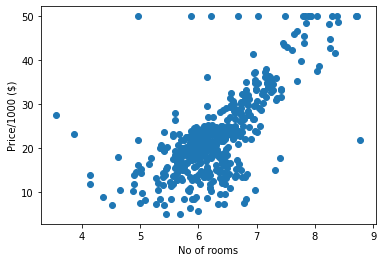

In [20]:
# RM 변수와 target과의 관계를 시각화
import matplotlib.pyplot as plt
X_rooms = boston['data'][:, 5] # 학습 데이터의 전체 행, 5번 열
# 산점도 그리기
plt.scatter(X_rooms, boston['target'])
plt.xlabel("No of rooms")
plt.ylabel("Price/1000 ($)")
plt.show()

In [21]:
# 선형 회귀 모델의 생성
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# 학습 진행
reg.fit(X_rooms.reshape(-1, 1), # 학습 데이터
        boston['target']) # 라벨 데이터
# 최종 목적은 회귀 선을 위한 가중치와 절편을 구하는 것
print("모델의 가중치:", reg.coef_)
print("모델의 절편:", reg.intercept_)

모델의 가중치: [9.10210898]
모델의 절편: -34.670620776438554


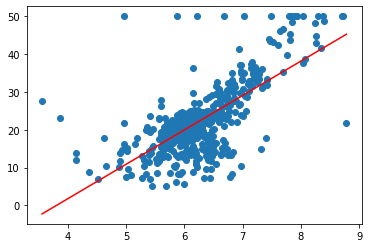

In [22]:
# 실제 학습 데이터와 회귀선
import numpy as np
pred_space = np.linspace(
    min(X_rooms), max(X_rooms)
).reshape(-1, 1)
# 산점도를 그려 봅니다.
plt.scatter(X_rooms, # x축
            boston['target']) # y축
# 회귀선 
plt.plot(pred_space, # X축
         reg.predict(pred_space),
         color="red"
        ) # 우리 모델의 예측값
plt.show()

In [23]:
# boston 데이터 셋 모든 특성을 이용한 예측
# 학습 데이터, 테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    boston['data'], boston['target'],
    test_size=0.3, # 테스트 데이터 셋 사이즈 30%
    random_state=42 # 재현성 확보를 위한 랜덤 시드
)

In [24]:
# 학습 진행
reg_all = LinearRegression()
reg_all.fit(X_train, y_train) # 학습 데이터와 학습 라벨

LinearRegression()

In [25]:
# 가중치와 절편
print("가중치:", reg_all.coef_)
print("절편:", reg_all.intercept_)

가중치: [-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]
절편: 31.63108403569312


In [26]:
# 모델 검증
print("훈련 세트 점수: {:.2f}".format(reg_all.score(X_train, y_train))) # 학습 데이터 
print("테스트 세트 점수: {:.2f}".format(reg_all.score(X_test, y_test))) # 테스트 데이터

훈련 세트 점수: 0.74
테스트 세트 점수: 0.71


In [27]:
# 보스턴 데이터 셋의 첫번째 데이터와 타겟
print("데이터 셋 관측치:", boston['data'][1])
print("데이터 셋 label:", boston['target'][1])
# 모델이 예측한 예측치
reg_all.predict(boston['data'][1].reshape(1, 13))

데이터 셋 관측치: [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
 7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
 9.1400e+00]
데이터 셋 label: 21.6


array([24.90986918])

In [28]:
# Ridge 회귀
# L2 규제를 사용하여 특성의 계수(기울기)를 최소화하는 모델
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1, # 알파 계수(규제)
             normalize=True)
ridge.fit(X_train, y_train)

print("Ridge 훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("Ridge 테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

Ridge 훈련 세트 점수: 0.74
Ridge 테스트 세트 점수: 0.70


In [29]:
# Lasso 회귀
# L1 규제를 사용하과 특정 계수를 0으로 만들어서 영향을 없애는 효과(특성 선택)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1, # 규제 계수
             normalize=True)
lasso.fit(X_train, y_train)

print("Lasso 훈련 세트 점수: {:.2f}".format(lasso.score(X_train, y_train))) # 학습 세트 점수
print("Lasso 테스트 세트 점수: {:.2f}".format(lasso.score(X_test, y_test)))
print("계수:", lasso.coef_)
# 라소 회귀는 특정 계수를 0으로 만든다
print("사용된 특성의 갯수:", np.sum(lasso.coef_ != 0))

Lasso 훈련 세트 점수: 0.62
Lasso 테스트 세트 점수: 0.60
계수: [-0.          0.         -0.          0.         -0.          3.18852894
 -0.         -0.         -0.         -0.         -0.3066901   0.
 -0.48666476]
사용된 특성의 갯수: 3


In [30]:
# 분류용 선형 모델
# LinearRegression, SVC(서포트 벡터 머신)
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [31]:
# 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(
    cancer['data'], cancer['target'],
    stratify=cancer.target,
    random_state=42
)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
print("LOGREG 훈련 세트 점수: {:.2f}".format(logreg.score(X_train, y_train)))
print("LOGREG 테스트 세트 점수: {:.2f}".format(logreg.score(X_test, y_test)))


LOGREG 훈련 세트 점수: 0.95
LOGREG 테스트 세트 점수: 0.97


c:\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
# 서포트 벡터 머신 : 회귀, 분류 양쪽 모두에 사용
from sklearn.svm import LinearSVC
svc = LinearSVC().fit(X_train, y_train)
print("SVC 훈련 세트 점수: {:.2f}".format(svc.score(X_train, y_train)))
print("SVC 테스트 세트 점수: {:.2f}".format(svc.score(X_test, y_test)))

SVC 훈련 세트 점수: 0.88
SVC 테스트 세트 점수: 0.86


c:\python\python37\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [33]:
# 규제 강도에 따른 정확도 
# 과적합 방지
# 선형 회귀 모델에 규제 강도별 점수
logreg100 = LogisticREgression(C=100).fit(X_train) # 규제 C = 100
logreg = LogisticREgression().fit(X_train, y_train) # 규제 C = 1
logreg001 = LogisticREgression(C=0.01).fit(X_train, y_train)

NameError: name 'LogisticREgression' is not defined